2805
2805


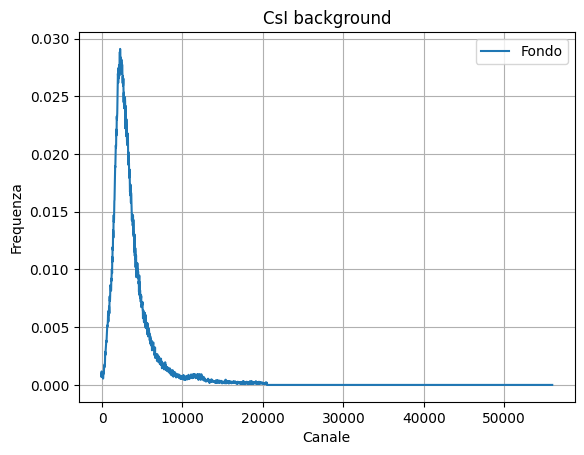

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2


def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list)

data = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\CsI\Fondo CsI\Misura di fondo CSI.CSV', sep=';')
data1 = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\CsI\Torio\CsI_torio.csv', sep=' \t', engine='python')

channel_back = np.array(data['Channel']) 
counts_back = np.array(data['Counts'])
time_back = 61638 #s
frequency_back = counts_back/time_back

counts_Th = np.array(data1['Counts'])
channel_Th = np.arange(-90, 10000000, 20)[:len(counts_Th)]
time_Th = 1211 #s
frequency_Th = counts_Th/time_Th

# devo allungare il fondo con tanti zeri
allungo_x = np.arange(channel_back[-1], 100000000, 20)
allungo_y = np.zeros(len(allungo_x))
channel_back = np.concatenate((channel_back, allungo_x))[:len(frequency_Th)]
counts_back = np.concatenate((counts_back, allungo_y))[:len(frequency_Th)]
frequency_back = np.concatenate((frequency_back, allungo_y))[:len(frequency_Th)]

print(len(channel_back))
print(len(frequency_Th))

plt.plot(channel_back, frequency_back, label='Fondo')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('CsI background')
plt.legend()
plt.grid()
plt.show()

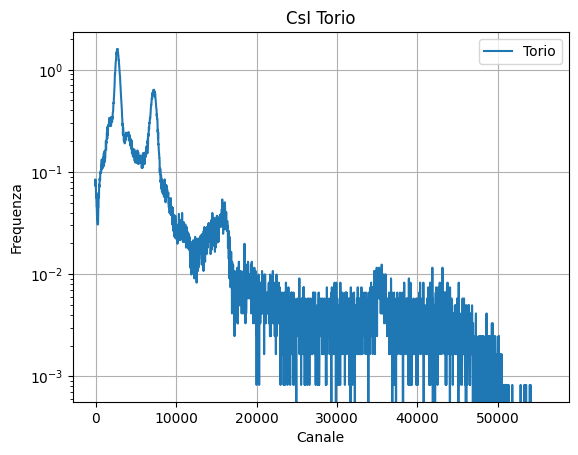

In [2]:
plt.plot(channel_Th, frequency_Th, label='Torio')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('CsI Torio')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

channel = channel_back
frequency = frequency_Th - frequency_back

for i in range(len(frequency)):
    if frequency[i] < 0:
        frequency[i] = 0

import plotly.express as px
fig = px.line(x=channel, y=frequency, title='Torio')
fig.show()

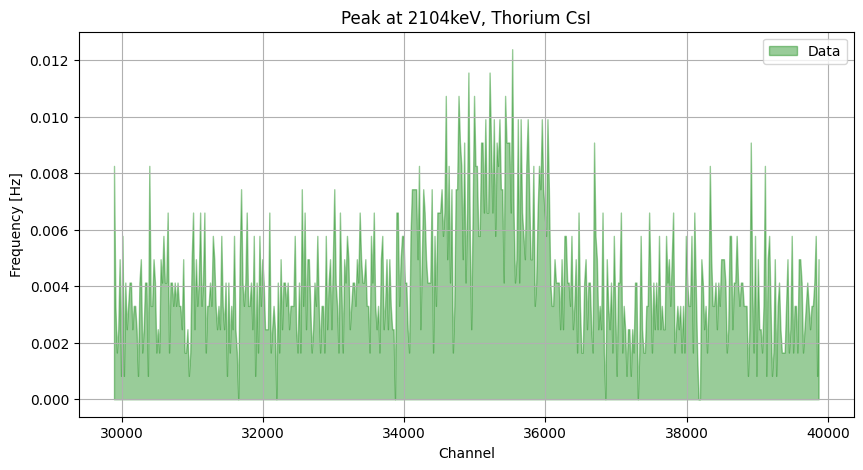

In [3]:
error = np.sqrt(counts_Th)/time_Th

x = channel[1500:2000][::1]
y = frequency[1500:2000][::1]

plt.subplots(figsize=(10, 5))
#plt.errorbar(x, y, yerr=error[1500:2000][::1], fmt='.', label='Data', color='green', alpha=0.5)
plt.xlabel('Channel')
plt.ylabel('Frequency [Hz]')
plt.title('Peak at 2104keV, Thorium CsI')
plt.fill_between(x, y, color="green", alpha=0.4, label='Data')

plt.legend()
plt.grid()
plt.show()

In [4]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

ls = LeastSquares(channel, frequency, error, func)

peak_list1460, error_peak_list1460, sigma_list1460, err_sigma_list1460 = repeat_fit(ls, 34000, 36300, 35350, 500, 0.01, 1100, dis=False)

print(peak_list1460)
print(error_peak_list1460)

c:\Users\Black\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning:

divide by zero encountered in divide

c:\Users\Black\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning:

invalid value encountered in divide



[35257.89746006 35254.03974185 35254.03974185 35250.29248169
 35250.29248169 35262.12964028 35262.12964028 35242.03680634
 35242.03680634 35274.95055613 35274.95055613 35287.34296776
 35287.34296776 35299.48278382 35299.48278382 35311.65870499
 35311.65870499 35314.94135281 35314.94135281 35248.65958485
 35248.65958485 35267.1679159  35267.1679159  35331.99731116
 35331.99731116 35299.99723253 35299.99723253 35319.48699507
 35319.48699507 35266.76393336 35266.76393336 35269.89183814
 35269.89183814 35239.65746821 35239.65746821 35337.69606227
 35337.69606227 35505.66017575 35505.66017575 35223.29991207
 35223.29991207 35263.35959897 35263.35959897 35240.00190445
 35240.00190445 35649.97058102 35649.97058102 35257.89746006
 35260.65716216 35254.03974185 35256.80403954 35256.80403954
 35253.06030624 35246.6298656  35228.2315099  35228.2315099
 35235.79080551 35251.66063533 35260.58158818 35260.58158818
 35269.04211516 35265.62980554 35273.62092565 35273.62092565
 35280.86629058 35300.310

In [5]:
def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = np.sqrt((abs(np.max(values) - np.min(values))/2)**2 + (1/np.sum(1/(errors**2))))
    return mean, error_mean

mean, error_mean = weighted_mean(peak_list1460, error_peak_list1460)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list1460, err_sigma_list1460)
print(sigma_mean, error_sigma_mean)


35284.64923506494 393.4152195973929
843.1607460823968 442.4166363350772


In [6]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

peak_list300, error_peak_list300, sigma_list300, err_sigma_list300 = repeat_fit(ls, 6630, 7630, 7235, 200, 0.7, 700, dis=False)

print(peak_list300)
print(error_peak_list300)

mean, error_mean = weighted_mean(peak_list300, error_peak_list300)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list300, err_sigma_list300)
print(sigma_mean, error_sigma_mean)

[7180.78991513 7180.78991513 7183.21641153 7183.21641153 7183.81432784
 7183.81432784 7186.57495853 7186.57495853 7196.06178359 7196.06178359
 7196.25292492 7196.25292492 7199.44531434 7199.44531434 7184.82952674
 7184.82952674 7182.82324816 7182.82324816 7202.10104351 7202.10104351
 7182.83076028 7182.83076028 7180.42277266 7180.42277266 7180.78991513
 7180.78991513 7182.20290502 7182.20290502 7184.23538983 7184.23538983
 7184.92266736 7184.92266736 7185.20204023 7185.20204023 7186.4071103
 7186.4071103  7188.36647045 7188.36647045 7188.13125629 7188.13125629
 7192.46954507 7192.46954507 7193.01703807 7193.01703807 7197.8275011
 7197.8275011  7200.77453707 7200.77453707 7199.5712781  7199.5712781
 7190.05935242 7190.05935242 7196.62014451 7196.62014451 7205.5973836
 7205.5973836  7190.64589206 7190.64589206 7186.74730611 7186.74730611
 7061.02808428 7061.02808428 7060.92744681 7060.92744681 7180.78991513
 7180.78991513 7182.03519891 7182.03519891 7182.92410546 7182.92410546
 7185.5481